In [1]:
import cv2,os

data_path='DATASET'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'test': 0, 'train': 1}
['test', 'train']
[0, 1]


In [2]:
data_path='DATASET/train'
classes_path=os.listdir(data_path)
classesf=os.listdir(data_path)
print(classesf)
labels_classes=[i for i in range(len(classesf))]
print(labels_classes)

['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [3]:
data_path='DATASET'

In [4]:
label_classes_dict=dict(zip(classesf,labels_classes))

In [5]:
#print(labels_classes)
#print(categories)
print(label_classes_dict)

{'0': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}


In [6]:
import numpy as np

In [7]:
img_size=128
data=[]
target=[]
c=0
minValue = 70
for category in categories:
    
    cat_path=os.path.join(data_path,category)
    print(cat_path)
    cat_names=os.listdir(cat_path)
    print(cat_names)
    for classes in cat_names:
        folder_path=os.path.join(data_path,category,classes)
        print(folder_path)
        img_names=os.listdir(folder_path)
        #print(img_names)
        for img_name in img_names:
            #print(img_name)
            img_path=os.path.join(folder_path,img_name)
            img=cv2.imread(img_path)
            
            try:
                gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
                blur = cv2.GaussianBlur(gray,(5,5),2)
                th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
                ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                #res=np.array(res)
                #print(type(res))
            #Converting the image into gray scale
                resized=cv2.resize(res,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
                data.append(resized)
                #print(data)
                target.append(label_classes_dict[classes])
            except Exception as e:
                print('Exception:',e)
            
            
        
        

DATASET\test
['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
DATASET\test\0
DATASET\test\A
DATASET\test\B
DATASET\test\C
DATASET\test\D
DATASET\test\E
DATASET\test\F
DATASET\test\G
DATASET\test\H
DATASET\test\I
DATASET\test\J
DATASET\test\K
DATASET\test\L
DATASET\test\M
DATASET\test\N
DATASET\test\O
DATASET\test\P
DATASET\test\Q
DATASET\test\R
DATASET\test\S
DATASET\test\T
DATASET\test\U
DATASET\test\V
DATASET\test\W
DATASET\test\X
DATASET\test\Y
DATASET\test\Z
DATASET\train
['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
DATASET\train\0
DATASET\train\A
DATASET\train\B
DATASET\train\C
DATASET\train\D
DATASET\train\E
DATASET\train\F
DATASET\train\G
DATASET\train\H
DATASET\train\I
DATASET\train\J
DATASET\train\K
DATASET\train\L
DATASET\train\M
DATASET\train\N
DATASET\train\O
DATASET\train\P
DATASET\train\Q
DATASET\

In [8]:
datanp=np.array(data)

In [9]:
datanp.shape

(17113, 128, 128)

In [10]:
targetnp=np.array(target)

targetnp.shape

(17113,)

In [11]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [12]:
new_target.shape

(17113, 27)

In [13]:
np.save('data_img',data)
np.save('target',new_target)

In [14]:
data=np.load('data_img.npy')
target=np.load('target.npy')

In [15]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.2)

In [16]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten 
from keras.layers import Dense , Dropout
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
sz = 128
# Step 1 - Building the CNN

# Initializing the CNN
classifier = Sequential()

# BEFORE
# # First convolution layer and pooling
# classifier.add(Convolution2D(32, (5, 5), input_shape=(sz, sz, 1), activation='relu'))
# classifier.add(MaxPooling2D(pool_size=(2, 2)))
# # Second convolution layer and pooling
# classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# # input_shape is going to be the pooled feature maps from the previous convolution layer
# classifier.add(MaxPooling2D(pool_size=(2, 2)))
# #classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# # input_shape is going to be the pooled feature maps from the previous convolution layer
# #classifier.add(MaxPooling2D(pool_size=(2, 2)))

# # Flattening the layers
# classifier.add(Flatten())

# # Adding a fully connected layer
# classifier.add(Dense(units=128, activation='relu'))
# classifier.add(Dropout(0.40))
# classifier.add(Dense(units=96, activation='relu'))
# classifier.add(Dropout(0.40))
# classifier.add(Dense(units=64, activation='relu'))
# classifier.add(Dense(units=27, activation='softmax')) # softmax for more than 2
# BEFORE

#AFTER
classifier.add(Convolution2D(32, (3,3), padding="same",input_shape=(sz, sz, 1), activation='relu'))
classifier.add(BatchNormalization(axis=1))
classifier.add(MaxPooling2D(pool_size=(3, 3)))
classifier.add(Dropout(0.25))
classifier.add(Convolution2D(64, (3, 3), padding="same", activation='relu'))
classifier.add(BatchNormalization(axis=1))
classifier.add(Convolution2D(64, (3, 3), padding="same", activation='relu'))
classifier.add(BatchNormalization(axis=1))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.25))
classifier.add(Convolution2D(128, (3, 3), padding="same", activation='relu'))
classifier.add(BatchNormalization(axis=1))
classifier.add(Convolution2D(128, (3, 3), padding="same", activation='relu'))
classifier.add(BatchNormalization(axis=1))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.25))
classifier.add(Flatten())
classifier.add(Dense(1024, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=27, activation='softmax'))
#AFTER

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2


# Step 2 - Preparing the train/test data and training the model
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 42, 42, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 42, 42, 64)       1

In [17]:
from keras.callbacks import ModelCheckpoint

In [18]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=classifier.fit(train_data,train_target,shuffle=True,epochs=10,callbacks=[checkpoint],validation_split=0.3)

Epoch 1/30
300/300 [==============================] - ETA: 0s - loss: 0.4861 - accuracy: 0.8609

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


300/300 [==============================] - 563s 2s/step - loss: 0.4861 - accuracy: 0.8609 - val_loss: 16.9389 - val_accuracy: 0.0351
Epoch 2/30
300/300 [==============================] - ETA: 0s - loss: 0.0409 - accuracy: 0.9888

INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


300/300 [==============================] - 1293s 4s/step - loss: 0.0409 - accuracy: 0.9888 - val_loss: 0.0468 - val_accuracy: 0.9910
Epoch 3/30
300/300 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.9971

INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


300/300 [==============================] - 1294s 4s/step - loss: 0.0131 - accuracy: 0.9971 - val_loss: 0.0043 - val_accuracy: 0.9995
Epoch 4/30
300/300 [==============================] - 1196s 4s/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.0068 - val_accuracy: 0.9990
Epoch 5/30
300/300 [==============================] - ETA: 0s - loss: 0.0100 - accuracy: 0.9976

INFO:tensorflow:Assets written to: model-005.model\assets


INFO:tensorflow:Assets written to: model-005.model\assets


300/300 [==============================] - 1154s 4s/step - loss: 0.0100 - accuracy: 0.9976 - val_loss: 0.0042 - val_accuracy: 0.9985
Epoch 6/30
300/300 [==============================] - 588s 2s/step - loss: 0.0217 - accuracy: 0.9945 - val_loss: 0.0266 - val_accuracy: 0.9903
Epoch 7/30
300/300 [==============================] - 446s 1s/step - loss: 0.0335 - accuracy: 0.9900 - val_loss: 0.1865 - val_accuracy: 0.9579
Epoch 8/30
300/300 [==============================] - 445s 1s/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.0082 - val_accuracy: 0.9983
Epoch 9/30
300/300 [==============================] - 448s 1s/step - loss: 0.0132 - accuracy: 0.9956 - val_loss: 0.0231 - val_accuracy: 0.9942
Epoch 10/30
300/300 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.9995

INFO:tensorflow:Assets written to: model-010.model\assets


INFO:tensorflow:Assets written to: model-010.model\assets


300/300 [==============================] - 534s 2s/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0035 - val_accuracy: 0.9995
Epoch 11/30
300/300 [==============================] - 445s 1s/step - loss: 0.0055 - accuracy: 0.9987 - val_loss: 0.0206 - val_accuracy: 0.9954
Epoch 12/30
300/300 [==============================] - 467s 2s/step - loss: 0.0713 - accuracy: 0.9803 - val_loss: 0.9369 - val_accuracy: 0.8356
Epoch 13/30
300/300 [==============================] - 1149s 4s/step - loss: 0.0234 - accuracy: 0.9914 - val_loss: 0.0045 - val_accuracy: 0.9995
Epoch 14/30
300/300 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 0.9984

INFO:tensorflow:Assets written to: model-014.model\assets


INFO:tensorflow:Assets written to: model-014.model\assets


300/300 [==============================] - 1258s 4s/step - loss: 0.0068 - accuracy: 0.9984 - val_loss: 0.0015 - val_accuracy: 0.9995
Epoch 15/30
300/300 [==============================] - 1244s 4s/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0020 - val_accuracy: 0.9998
Epoch 16/30
300/300 [==============================] - 862s 3s/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0017 - val_accuracy: 0.9998
Epoch 17/30
300/300 [==============================] - 455s 2s/step - loss: 0.0056 - accuracy: 0.9978 - val_loss: 0.0037 - val_accuracy: 0.9988
Epoch 18/30
300/300 [==============================] - 455s 2s/step - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.0064 - val_accuracy: 0.9988
Epoch 19/30
300/300 [==============================] - ETA: 0s - loss: 0.0082 - accuracy: 0.9975

INFO:tensorflow:Assets written to: model-019.model\assets


INFO:tensorflow:Assets written to: model-019.model\assets


300/300 [==============================] - 456s 2s/step - loss: 0.0082 - accuracy: 0.9975 - val_loss: 9.6321e-04 - val_accuracy: 0.9995
Epoch 20/30
300/300 [==============================] - 451s 2s/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0011 - val_accuracy: 0.9998
Epoch 21/30
300/300 [==============================] - 452s 2s/step - loss: 0.0088 - accuracy: 0.9978 - val_loss: 0.0065 - val_accuracy: 0.9983
Epoch 22/30
300/300 [==============================] - 454s 2s/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.0433 - val_accuracy: 0.9910
Epoch 23/30
300/300 [==============================] - 454s 2s/step - loss: 0.0152 - accuracy: 0.9954 - val_loss: 0.0104 - val_accuracy: 0.9976
Epoch 24/30
300/300 [==============================] - 455s 2s/step - loss: 0.0253 - accuracy: 0.9921 - val_loss: 0.0060 - val_accuracy: 0.9983
Epoch 25/30
300/300 [==============================] - 458s 2s/step - loss: 0.0071 - accuracy: 0.9979 - val_loss: 0.0195 - val_accuracy: 0.9959


In [19]:
print(classifier.evaluate(test_data,test_target))

107/107 [==============================] - 35s 331ms/step - loss: 2.5756e-05 - accuracy: 1.0000
[2.5755616661626846e-05, 1.0]


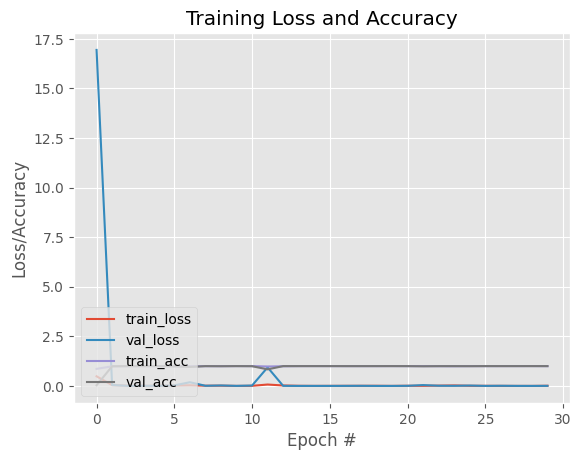

In [20]:
from matplotlib import pyplot as plt
N = 10
H=history
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('evaluation.png')

In [21]:
# serialize the model to disk
print("[INFO] saving mask detector model...")
# classifier.save('asl_classifier.h5')
classifier.save('asl5_classifier.h5')
print("Done !")

[INFO] saving mask detector model...
Done !


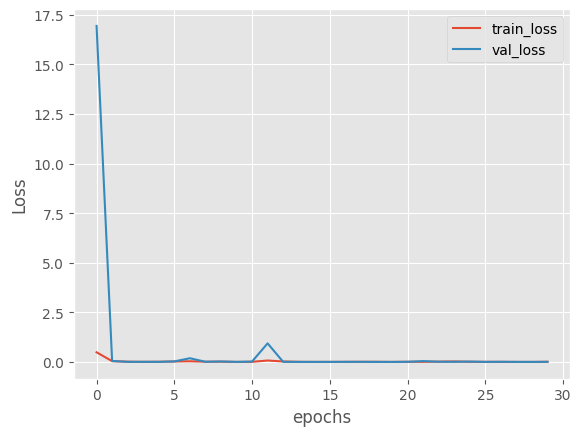

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train_loss','val_loss'], loc=0)
plt.show()

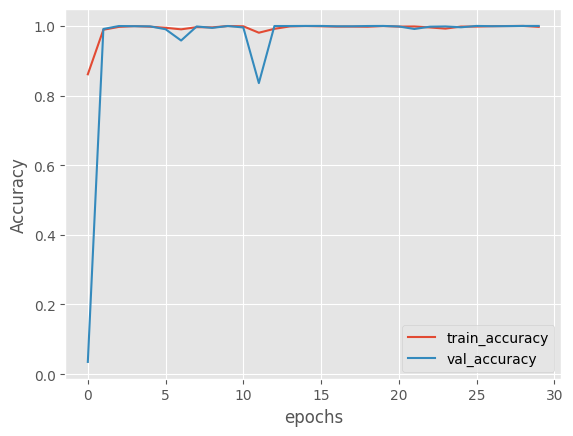

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train_accuracy','val_accuracy'], loc=0)
plt.show()